In [1]:
#importing required libraries
import pandas as pd 
import numpy as np 
import tweepy 
import requests
import re
import json 
import matplotlib.pyplot as plt 
import datetime 
import os 
import seaborn as sns 
%matplotlib inline 

# Data Gathering

In [2]:
#importing Enahanced Twitter Archive data 
archive_df = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
#importing Image Predictions File 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as f:
        f.write(response.content)
Image_predictions_df = pd.read_csv(file_name,sep='\t')

In [ ]:
#importing the Additional Data via the Twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")b
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#read the tweet_json.txt file line by line into a 
#pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


# Data Assesing

In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


## Quality issues: 

### 'archive_df'
- timestamp column is not a datetime object. (8)
- timestamp column has extra +0000 (7)
- Inconsistent representation of null values as “None” strings in the (name, doggo, floofer, pupper, puppo) columns. (1)
- Erroneous pet names like the letter “a” and “an”. (6) 
- Incorrect and weird values of the rating_numerator and rating_denominator. (5)
- Retweets and Replies within the dataframe. (3)
- Tweets which don't have Images. (4)
- Source data column is not clear (9)
### 'Image_predictions_df'
- Non-descriptive columns’ names in the image_predictions dataset. (2)
### 'api_df'

## Tidiness issues: 
- api_df doesn't represent a whole observational unit and it’s just displaying some extra attributes of the tweet and can be merged with the archive_df. (1) 
- Column headers are values, not variable names in the Image_predictions_df (3)
- doggo, floofer, pupper, puppo should be in single column of Categorical variable (2)



# Data Cleaning

In [119]:
#Getting Copies of Each datafeame gathered in the first step 
archive_df_cleaned = archive_df.copy()
Image_predictions_df_cleaned = Image_predictions_df.copy()
api_df_cleaned = api_df.copy()

## Tidiness 

#### 1- api_df and Image_predictions_df  don't  represent a whole observational unit and it’s just displaying some extra attributes of the tweet and can be merged with the archive_df.

##### Define
Join archive_df and api_df into one dataframe. 

##### Code

In [120]:
# merge 'archive_df_cleaned' and 'api_df_cleaned'
archive_df_cleaned = pd.merge(archive_df_cleaned, api_df_cleaned,
                                   how = 'inner', on = 'tweet_id')
# merge 'archive_df_cleaned' and 'Image_predictions_df_cleaned' into twitter_master_df

twitter_master_df = pd.merge(archive_df_cleaned, Image_predictions_df_cleaned,
                                   how = 'inner', on = 'tweet_id')


##### Test

In [121]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### 2- doggo, floofer, pupper, puppo should be in single column of Categorical variable


##### Define
Insert another column in the archive_df_cleaned called dog_stage

##### Code

In [122]:
#replace any “None” with empty string “”
twitter_master_df['doggo']= twitter_master_df['doggo'].replace('None','')
twitter_master_df['floofer']= twitter_master_df['floofer'].replace('None','')
twitter_master_df['pupper']= twitter_master_df['pupper'].replace('None','')
twitter_master_df['puppo']= twitter_master_df['puppo'].replace('None','')

In [123]:
#add the four columns using summation
twitter_master_df['dog_stage'] = twitter_master_df['doggo'] + twitter_master_df['floofer'] + twitter_master_df['pupper'] + twitter_master_df['puppo']

In [124]:
# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_master_df = twitter_master_df.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])
#notice here that we also solve a quality issue 
#because the dogs which don't have names filled with 'NaN' -> Quality Issue(1) -> SOLVED

In [125]:
twitter_master_df['dog_stage'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [126]:
twitter_master_df.loc[twitter_master_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
twitter_master_df.loc[twitter_master_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
twitter_master_df.loc[twitter_master_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [127]:
twitter_master_df['dog_stage'].value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo-pupper       11
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [128]:
#Replace the empty strings with np.nan
twitter_master_df['dog_stage']= twitter_master_df['dog_stage'].replace('',np.NaN)

##### Test

In [129]:
twitter_master_df['dog_stage'].value_counts()

pupper           210
doggo             67
puppo             23
doggo-pupper      11
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [130]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  retweet_count               2073 

## Quality  

#### 2- Non-descriptive columns’ names like p1  , p1_conf ..etc
#### 3- Retweets and Replies within the dataframe.
#### 4- Tweets which don't have Images.

#####  Define
Select the tweets which doesn't have retweets and replies and remove ones which don't have images in the Image_predictions_df_cleaned

#####  Code 

In [131]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(twitter_master_df.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == twitter_master_df.tweet_id.isin(tweets_with_image).sum()
# Cleaning in action ;)
#Removing tweets which don't have images
twitter_master_df = twitter_master_df[twitter_master_df.tweet_id.isin(tweets_with_image)]

# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
retweet_entries = twitter_master_df.retweeted_status_id.notnull()

# Dropping the retweets from the archive data set
twitter_master_df = twitter_master_df[~retweet_entries]

# Extracting replies entries with the same method as the retweets
reply_entries = twitter_master_df.in_reply_to_user_id.notnull()

#Dropping the replies from the archive data set
twitter_master_df = twitter_master_df[~reply_entries]

# Drop extra columns
twitter_master_df = twitter_master_df.drop(columns=['in_reply_to_status_id', 
                                                'in_reply_to_user_id', 
                                                'retweeted_status_id', 
                                                'retweeted_status_user_id', 
                                                'retweeted_status_timestamp',
                                                'expanded_urls',
                                                 'jpg_url',
                                                 'img_num'])



In [132]:
#Rename Non-descriptive columns column names'
twitter_master_df = twitter_master_df.rename(
columns= {'p1': 'prediction_1','p2': 'prediction_2','p3': 'prediction_3',
         'p1_conf': 'predict1_confidence','p2_conf': 'predict2_confidence','p3_conf': 'predict3_confidence',
         'p1_dog': 'predict1_dog_breed!','p2_dog': 'predict2_dog_breed!','p3_dog': 'predict3_dog_breed!'})

#####  Test 

In [133]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1971 non-null   int64  
 1   timestamp            1971 non-null   object 
 2   source               1971 non-null   object 
 3   text                 1971 non-null   object 
 4   rating_numerator     1971 non-null   int64  
 5   rating_denominator   1971 non-null   int64  
 6   name                 1971 non-null   object 
 7   retweet_count        1971 non-null   int64  
 8   favorite_count       1971 non-null   int64  
 9   user_count           1971 non-null   int64  
 10  prediction_1         1971 non-null   object 
 11  predict1_confidence  1971 non-null   float64
 12  predict1_dog_breed!  1971 non-null   bool   
 13  prediction_2         1971 non-null   object 
 14  predict2_confidence  1971 non-null   float64
 15  predict2_dog_breed!  1971 non-null   b

#### 5- Incorrect and weird values of the rating_numerator and rating_denominator.

##### 5.1  rating_denominator > 10

#####  5.1 Define
rating_denominator should be equal to '10' 

#####  5.1 Code

In [134]:
twitter_master_df.drop(twitter_master_df[twitter_master_df.rating_denominator != 10].index, inplace = True)

#####  5.1 Test

In [135]:
twitter_master_df['rating_denominator'].value_counts()

10    1954
Name: rating_denominator, dtype: int64

##### 5.2  Some of rating_numerators are extreme values.

#####  5.2 Define 
Drop rows where numerator rating >> 10

In [136]:
twitter_master_df.drop(twitter_master_df[twitter_master_df.rating_numerator > 15].index, inplace = True)


#####  5.2 Test 

In [137]:
twitter_master_df.rating_numerator.value_counts()


12    446
10    417
11    392
13    253
9     149
8      95
7      51
14     33
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

##### 5.3 Define
Since all the denominator is 10 after last step, we can get rid of rating_denominator column and change rating_numerators to 'rating'.

##### 5.3 Code  

In [138]:
# Drop column
twitter_master_df = twitter_master_df.drop(columns=['rating_denominator'])
# Change column name
twitter_master_df.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

##### 5.3 Test   

In [139]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1949 non-null   int64  
 1   timestamp            1949 non-null   object 
 2   source               1949 non-null   object 
 3   text                 1949 non-null   object 
 4   rating               1949 non-null   int64  
 5   name                 1949 non-null   object 
 6   retweet_count        1949 non-null   int64  
 7   favorite_count       1949 non-null   int64  
 8   user_count           1949 non-null   int64  
 9   prediction_1         1949 non-null   object 
 10  predict1_confidence  1949 non-null   float64
 11  predict1_dog_breed!  1949 non-null   bool   
 12  prediction_2         1949 non-null   object 
 13  predict2_confidence  1949 non-null   float64
 14  predict2_dog_breed!  1949 non-null   bool   
 15  prediction_3         1949 non-null   object

#### 6- Erroneous pet names like the letter “a” and “an”. 

#####  Define
Using Reqular Expressions we can change erroneous names.

#####  Code  

In [140]:
def incorrect_name(row):
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']
    
# Call function and apply by columns
twitter_master_df['name'] = twitter_master_df.apply(incorrect_name, axis = 1)

# Change all the'None' in names to np.nan
twitter_master_df['name'].replace('None', np.nan, inplace=True)


#####  Test 

In [141]:
twitter_master_df.name.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
           ..
Snicku      1
Pilot       1
Jamesy      1
Tito        1
Hall        1
Name: name, Length: 909, dtype: int64

#### 7- timestamp column has extra +0000.
#### 8- timestamp column is not a datetime object. 

##### Define 
7- Remove extra +0000
8- Convert timestamp column to datetime object

##### Code 

In [142]:
# Strip +0000 from timestamp column
twitter_master_df.timestamp = twitter_master_df.timestamp.str.strip('+0000')

# Convert data type to datetime
twitter_master_df.timestamp = pd.to_datetime(twitter_master_df.timestamp)

##### Test  

In [143]:
twitter_master_df.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2068   2015-11-16 00:24:50
2069   2015-11-16 00:04:52
2070   2015-11-15 23:21:54
2071   2015-11-15 23:05:30
2072   2015-11-15 22:32:08
Name: timestamp, Length: 1949, dtype: datetime64[ns]

#### 9- Source data is not clear 

##### Define   
Use Regex to solve the issue. 

##### Code

In [144]:
# Use regex and str.extract to get real source
twitter_master_df['source'] = twitter_master_df['source'].str.extract('>(.*)<')

##### Test

In [145]:
twitter_master_df['source'].value_counts()


Twitter for iPhone    1911
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

## The Clean and Tidy Data 

In [146]:
twitter_master_df.head()

,tweet_id,timestamp,source,text,rating,name,retweet_count,favorite_count,user_count,prediction_1,predict1_confidence,predict1_dog_breed!,prediction_2,predict2_confidence,predict2_dog_breed!,prediction_3,predict3_confidence,predict3_dog_breed!,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,8853,39467,3200889,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,6514,33819,3200889,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,4328,25461,3200889,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,8964,42908,3200889,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,9774,41048,3200889,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


# Storing

In [147]:
# Store the clean df in CSV file with name 'twitter_archive_clean.csv'
twitter_master_df.to_csv('twitter_archive_master.csv')

# Visualizing Data

# Insight(1) -> "pupper" is the most famous type between fans.

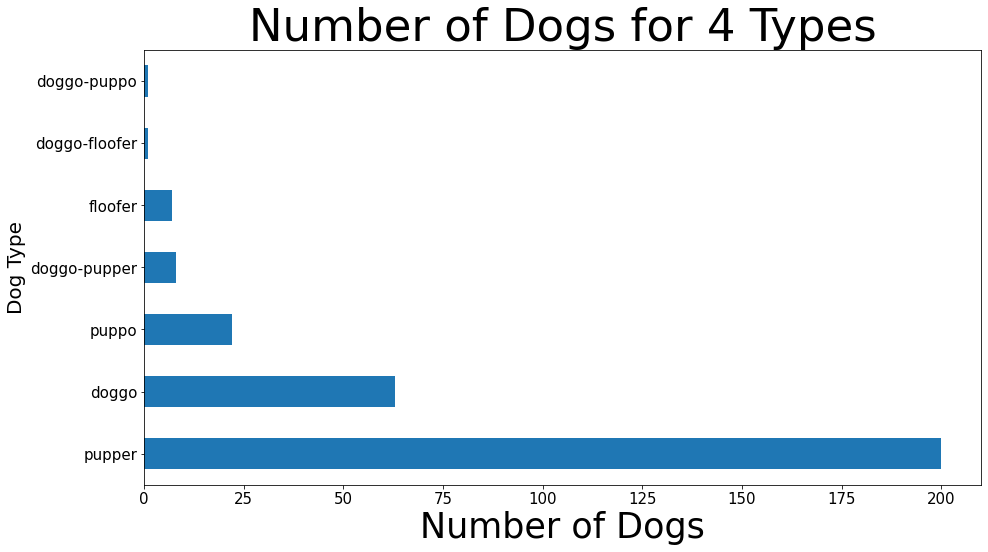

In [150]:
# Plot 4 dog stages
plt.figure(figsize=(15,8))
plt.title("Number of Dogs for 4 Types", size=45)
plt.ylabel("Dog Type", size=20)
plt.xlabel("Number of Dogs", size=35)
twitter_master_df.dog_stage.value_counts().plot(kind='barh', fontsize=15);

# Insight(2) -> "Golden_Retriever" is the most famous breed between fans.

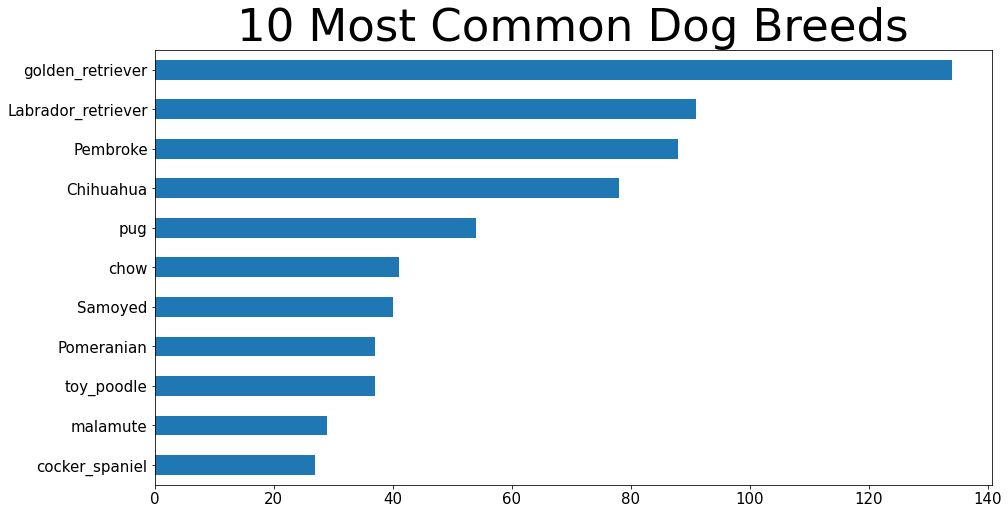

In [152]:
plt.figure(figsize=(15,8))
plt.title("10 Most Common Dog Breeds", size=45)
twitter_master_df['prediction_1'].value_counts()[10::-1].plot(kind='barh',fontsize=15);

# Insight(3) -> Retweets and Favourite counts Increase over time.

In [153]:
# Create copy of twitter_archive_clean to work off of using only my variables of interest
time_df = twitter_master_df[['timestamp', 'retweet_count', 'favorite_count', 'rating']].copy()

In [154]:
# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)

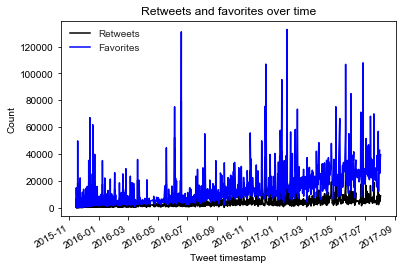

In [155]:
time_df['retweet_count'].plot(color = 'black', label='Retweets')
time_df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

# Visualizing Data has been made using Power BI and it's attached within the act_report.pdf